# Norwood Time-Dependent Model Demo

This notebook defines the time-dependent Norwood model, checks parameter validity,
runs a short simulation, and plots all flows and pressures.

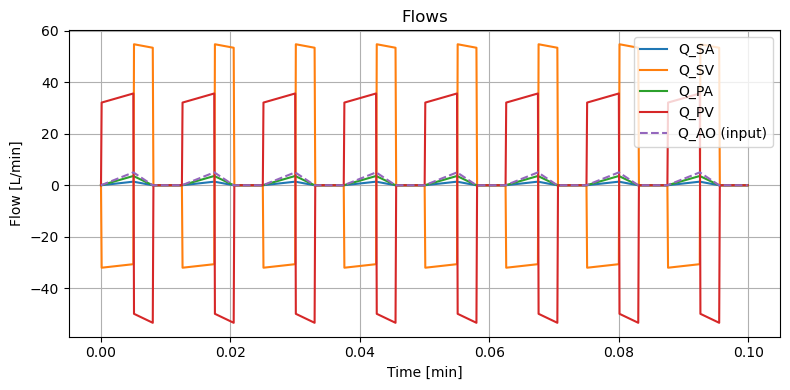

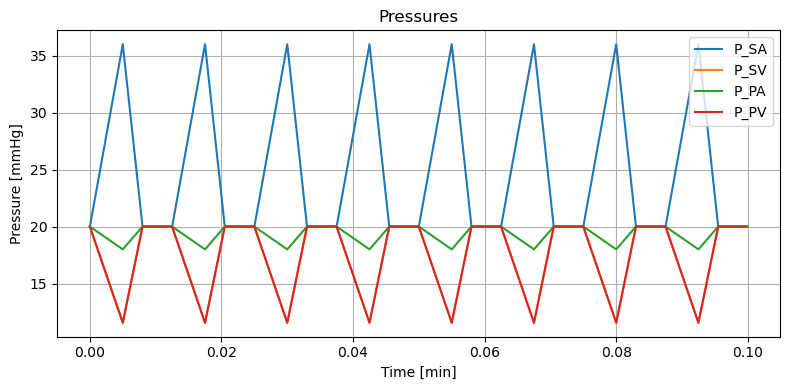

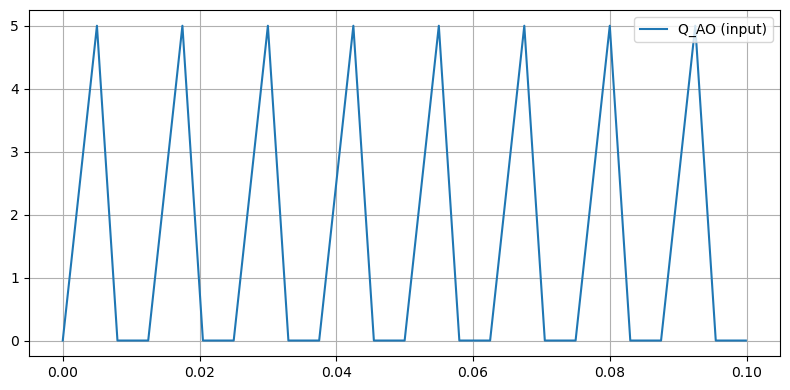

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Import your functions
from time_dependent_model import time_dependent_norwood, Q_Ao

# ----------------------------------------------------
# Simulation parameters (all times in MINUTES)
# ----------------------------------------------------

# Resistances (Wood units = mmHg·min / L)
R_s   = 17.5
R_p   = 1.79
R_BTS = 5.0

# Compliances (L/mmHg)
C_s = 0.01     # 1 mL/mmHg = 0.001 L/mmHg
C_p = 0.08

# Initial pressures (mmHg)
P_sa_0 = 20.0
P_pa_0 = 20.0

# Time (minutes)


t_end = .1
dt = 0.0001

# ----------------------------------------------------
# Run the Norwood model
# ----------------------------------------------------

(t, Q_sa, Q_sv, Q_pa, Q_pv, P_sa, P_sv, P_pa, P_pv) = time_dependent_norwood(
    R_s, R_p, R_BTS,
    C_s, C_p,
    P_sa_0, P_pa_0,
    Q_Ao,          
    t_end, dt
)

# Q_AO evaluated on same grid
Q_AO = np.array([Q_Ao(ti) for ti in t])

# ----------------------------------------------------
# Plot flows: all in L/min vs time in minutes
# ----------------------------------------------------

plt.figure(figsize=(8,4))
plt.plot(t, Q_sa, label="Q_SA")
plt.plot(t, Q_sv, label="Q_SV")
plt.plot(t, Q_pa, label="Q_PA")
plt.plot(t, Q_pv, label="Q_PV")
plt.plot(t, Q_AO, "--", label="Q_AO (input)")
plt.xlabel("Time [min]")
plt.ylabel("Flow [L/min]")
plt.title("Flows")
plt.legend()
plt.grid(True)
plt.tight_layout()

# ----------------------------------------------------
# Plot pressures: mmHg vs time in minutes
# ----------------------------------------------------

plt.figure(figsize=(8,4))
plt.plot(t, P_sa, label="P_SA")
plt.plot(t, P_sv, label="P_SV")
plt.plot(t, P_pa, label="P_PA")
plt.plot(t, P_pv, label="P_PV")
plt.xlabel("Time [min]")
plt.ylabel("Pressure [mmHg]")
plt.title("Pressures")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


plt.figure(figsize=(8,4))
plt.plot(t, Q_AO, "-", label="Q_AO (input)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
